## About the Boston Dataset 

#### Referance :-https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d

The dataset used in this project comes from the UCI Machine Learning Repository. This data was collected in 1978 and each of the 506 entries represents aggregate information about 14 features of homes from various suburbs located in Boston.

Boston

![Image of Boston](BostonImage.png)

#### What do the column headers mean?


1. CRIM: This is the per capita crime rate by town
2. ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
3. INDUS: This is the proportion of non-retail business acres per town.
4. CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0        otherwise)
5. NOX: This is the nitric oxides concentration (parts per 10 million)
6. RM: This is the average number of rooms per dwelling
7. AGE: This is the proportion of owner-occupied units built prior to 1940
8. DIS: This is the weighted distances to five Boston employment centers
9. RAD: This is the index of accessibility to radial highways
10. TAX: This is the full-value property-tax rate per 10,000 dollors
11. PTRATIO: This is the pupil-teacher ratio by town
12. B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African       American descent by town
13. LSTAT: This is the percentage lower status of the population
14. MEDV: This is the median value of owner-occupied homes in 1000s dollors

In [110]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as ss
import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [111]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [112]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [113]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [114]:
#check for missing values
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [115]:
#Looging for relationship between Crime and house price
boston['MEDV'] = boston_dataset.target
x=boston['MEDV']


In [165]:
y = boston['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

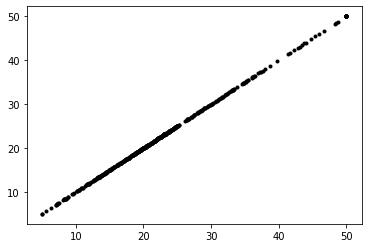

In [166]:
plt.plot(x,y,'k.')

In [167]:
##Graph Above maybe a liner, look at it
## setup a t-test



In [119]:
#avg B above 356, if more than 356 =1 else = 0
boston['check'] = np.where(boston['B']>356, 1, 0)

In [181]:
boston['moretoxix'] = np.where(boston['check']==1, boston['MEDV'],0)
boston['lesstoxic'] = np.where(boston['check']==0, boston['MEDV'],0)

In [183]:
l= boston['lesstoxic'][boston['lesstoxic'] != 0.00000].head(50)
m = boston['moretoxix'][boston['moretoxix'] != 0.00000].head(50)
#h

In [184]:
ss.ttest_ind(l,m)

Ttest_indResult(statistic=-1.9071596135650297, pvalue=0.05942839530233248)

In [171]:
import statsmodels.stats.weightstats as ws

In [185]:
ws.ttest_ind(l, m)

(-1.907159613565027, 0.05942839530233286, 98.0)

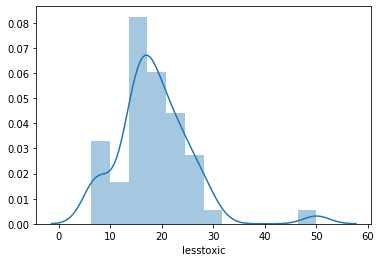

In [186]:
#seaborn plot
sns.distplot(l)

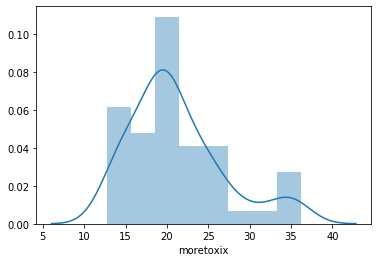

In [187]:
sns.distplot(m)

In [189]:
moreLess =['lesstoxic'] * 50 + ['moretoxic'] * 50
resML =  np.concatenate([m , l])
resML

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 18.2, 13.6, 19.6, 15.2,
       14.5, 15.6, 16.6, 18.4, 21. , 12.7, 14.5, 13.1, 18.9, 20. , 21. ,
       24.7, 30.8, 34.9, 26.6, 25.3, 24.7, 21.2, 19.3, 20. , 16.6, 14.4,
       19.4, 19.7, 20.5, 25. , 23.4, 18.9, 20.2, 13.9, 14.8, 13.2, 13.5,
       18.6, 18.3, 20.4, 15.6, 13.8, 15.6, 15.4, 19.6, 15.3, 19.4, 17. ,
       15.6, 13.1, 24.3, 27. , 25. , 23.8, 23.8, 22.3, 17.4, 19.1, 30.3,
       23.7, 20.1, 16.1, 19.9, 16.8, 21.9, 27.5, 21.9, 23.1, 50. ,  8.8,
        6.3,  8.5, 27.9, 17.2, 27.5, 15. , 17.2, 17.9, 16.3,  7. ,  7.2,
        7.5])

In [190]:
df = pd.DataFrame({'moreLess':moreLess,'resML':resML})
df

,moreLess,resML
0,lesstoxic,24.0
1,lesstoxic,21.6
2,lesstoxic,34.7
3,lesstoxic,33.4
4,lesstoxic,36.2
5,lesstoxic,28.7
6,lesstoxic,22.9
7,lesstoxic,27.1
8,lesstoxic,16.5
9,lesstoxic,18.9


In [191]:
#get all the high values
df[df['moreLess']=='moretoxic']['resML']

50    20.2
51    13.9
52    14.8
53    13.2
54    13.5
55    18.6
56    18.3
57    20.4
58    15.6
59    13.8
60    15.6
61    15.4
62    19.6
63    15.3
64    19.4
65    17.0
66    15.6
67    13.1
68    24.3
69    27.0
70    25.0
71    23.8
72    23.8
73    22.3
74    17.4
75    19.1
76    30.3
77    23.7
78    20.1
79    16.1
80    19.9
81    16.8
82    21.9
83    27.5
84    21.9
85    23.1
86    50.0
87     8.8
88     6.3
89     8.5
90    27.9
91    17.2
92    27.5
93    15.0
94    17.2
95    17.9
96    16.3
97     7.0
98     7.2
99     7.5
Name: resML, dtype: float64

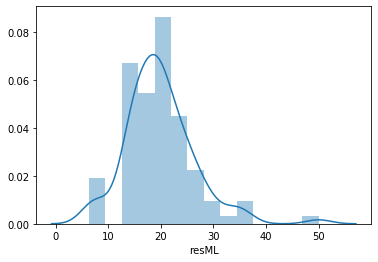

In [192]:
sns.distplot(df['resML'])

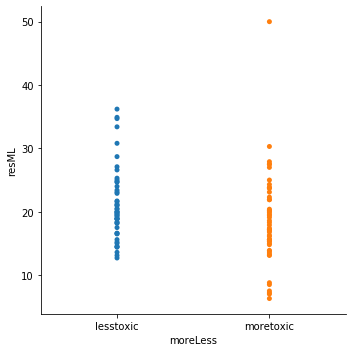

In [193]:
sns.catplot(x ='moreLess', y = 'resML',jitter=False,data=df)

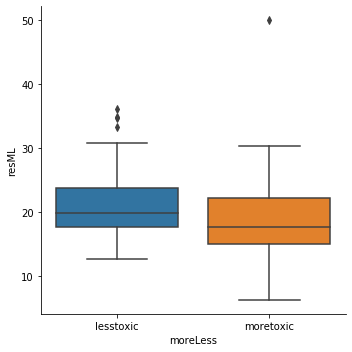

In [194]:
sns.catplot(x ='moreLess', y = 'resML',kind='box',data=df)